# Simple dependency parsing using stanza

In [1]:
import stanza

In [2]:
#Load English Pipeline
nlp=stanza.Pipeline('en')

2025-07-30 09:09:09 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-07-30 09:09:10 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |
| sentiment    | sstplus             |
| ner          | ontonotes_charlm    |

2025-07-30 09:09:10 INFO: Using device: cpu
2025-07-30 09:09:10 INFO: Loading: tokenize
2025-07-30 09:09:10 INFO: Loading: pos
2025-07-30 09:09:10 INFO: Loading: lemma
2025-07-30 09:09:11 INFO: Loading: constituency
2025-07-30 09:09:11 INFO: Loading: depparse
2025-07-30 09:09:11 INFO: Loading: sentiment
2025-07-30 09:09:11 INFO: Loading: ner
2025-07-30 09:09:12 INFO: Done loading processors!


In [3]:
#Input Sentence
sentence="The quick brown fox jumps over the lazy dog"

In [4]:
#Process the sentence
doc=nlp(sentence)

In [5]:
#Print dependencies
print("Word \t Head \t Relation")
for sent in doc.sentences:
    for word in sent.words:
        head=sent.words[word.head-1].text if word.head>0 else "ROOT"
        print(f"{word.text} \t {head} \t {word.deprel}")

Word 	 Head 	 Relation
The 	 fox 	 det
quick 	 fox 	 amod
brown 	 fox 	 amod
fox 	 jumps 	 nsubj
jumps 	 ROOT 	 root
over 	 dog 	 case
the 	 dog 	 det
lazy 	 dog 	 amod
dog 	 jumps 	 obl


# Advanced Dependency tree visualization using networkx + matplotlib

In [6]:
import stanza
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
#Load NLP Pipeline
nlp=stanza.Pipeline('en')
sentence="The quick brown fox jumps over the lazy dog"
doc=nlp(sentence)
G=nx.DiGraph()
for sent in doc.sentences:
    for word in sent.words:
        head_text="ROOT" if word.head==0 else sent.words[word.head-1].text
        G.add_edge(head_text,word.text,label=word.deprel)

2025-07-30 09:09:48 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-07-30 09:09:49 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |
| sentiment    | sstplus             |
| ner          | ontonotes_charlm    |

2025-07-30 09:09:49 INFO: Using device: cpu
2025-07-30 09:09:49 INFO: Loading: tokenize
2025-07-30 09:09:49 INFO: Loading: pos
2025-07-30 09:09:50 INFO: Loading: lemma
2025-07-30 09:09:50 INFO: Loading: constituency
2025-07-30 09:09:50 INFO: Loading: depparse
2025-07-30 09:09:50 INFO: Loading: sentiment
2025-07-30 09:09:50 INFO: Loading: ner
2025-07-30 09:09:51 INFO: Done loading processors!


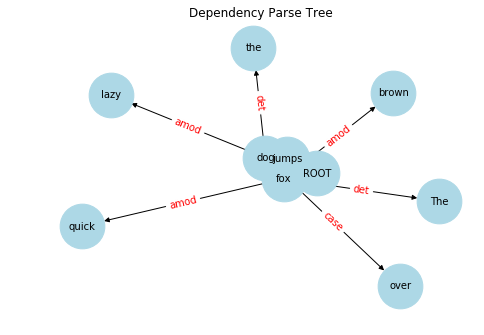

In [8]:
#Draw the graph
pos=nx.spring_layout(G)
labels=nx.get_edge_attributes(G,'label')
nx.draw(G,pos,with_labels=True,node_size=2000, node_color='lightblue', font_size=10)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_color='red')
plt.title("Dependency Parse Tree")
plt.show()